Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [9]:
NAME = "Marisa de Gelder, 2014703"
COLLABORATORS = ""

---

Fill in the cell above to provide us with your name and student number, like

NAME = "Adam Smith, #student number#"

where you replace "#student number#" with your ... (very good!)

Unfortunately, you are not allowed to work with "COLLABORATORS" in this exam.

# exam October 16th, 2018

With this python part of the exam you can earn at max. 4 points.




In the first cell of the notebook, give us your name and student number in the way indicated above. 

Fill in the notebook (see below for code cells and text cells that you need to fill in).

If you look at the menus above (File, Edit, View etc.), there is one called "Cell". If you click on this, you can change the "Cell Type". Choose "Code" when you are typing python or R code. Choose "Markdown" when you are typing, well, markdown.

When you finish the notebook, make sure that you **save it with the output of your code included**. 

Then put it on github, e.g. by dragging it onto github (see instructions below). 

Finally, add a link to your README file with the name of this exam: "Exam October 16, 2018".



## Competition and number of firms

We start by importing the usual libraries.

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import optimize
%matplotlib inline

We consider a market with $n$ firms where $n$ can vary. The (inverse) demand function on this market is given by $p(Q)=1-Q$ and firms produce with the same cost function: $c(q)=0.1q$. 

In [50]:
def p(Q):
    return 1-Q

def c(q):
    return 0.1*q

#### a) [0.5 points] Explain in words what the following code does. In particular, why is this the best response of a firm if its competitors produce $Q$ in total? What does "0,1" at the end of the `fminbound` statement mean?

In [51]:
def Best_response(Q):
    q = optimize.fminbound(lambda x: -(p(x+Q)*x-c(x)),0,1)
    return q

This code is a function for the best response of a firm. The q is the variable that can change. 
Optimize.fminbound stands for bounded minimization for scalar functions. This function can get the maximum q for the firm, so this will give the value where the firm gets the maximum profit. Because in Python, there is no possibility to maximize, the function will be used with a minus in the beginning. 

The total supply consists of x, how much the firm produces itself and Q, how much its competitors produce in total, multiplied with p. The costs of the firm should be substracted from this.  

0,1 at the end of the fminbound statement stands for the optimization bounds.This means that q will have a value between 0 and 1.

The following cell calculates the fixed point for a symmetric equilibrium: if each firm produces $q$ then $q$ should be the best respons to the other firms producing $Q=(n-1)q$ together.

In [52]:
def fixed_point(q,n):
    return q-Best_response((n-1)*q)

#### b) [1 point] Define a function `output(n)` that gives each firm's output level as a function of the number of firms in the market.

[hint: you need to "solve" `fixed_point` as a function of `q`, for a given `n`; use one of the numerical solvers that we used in class]

In [53]:
def output(n):
    return 0.9/n

#optimize.fsolve(lambda x: fixed_point(q,[0,1]))

If you cannot solve b) then use the following function for the remainder of this exam:

`def output(n):
    return 0.9/n`

#### c) [0.5 points] Explain line by line what the following code does. 

[hint: do not worry if you get a "RuntimeWarning"]

In [54]:
range_n = np.arange(1,101,1)
outputs = [output(n) for n in range_n]

df = pd.DataFrame({'n':range_n, 'q':outputs})

range_n = np.arange(1,101,1):
This means that n goes from 1 to 100 with steps of 1. So, in this market, there are 100 firms. 

outputs = [output(n) for n in range_n]:
This means that the outputs in total depend on the outputs of all the firms together. 

df = pd.DataFrame({'n':range_n, 'q':outputs}):
A dataframe is created with panda where n is defined with the formula for range_n, and q is defined with the formula for outputs. 

#### d) [0.5 points] Plot output per firm $q$ as a function of the number of firms $n$. Put labels on both the horizontal and vertical axes to explain what they show.

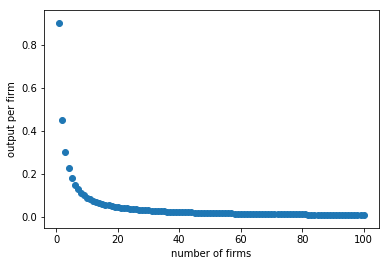

In [55]:
plt.scatter(df["n"], df["q"])
plt.xlabel ('number of firms')
plt.ylabel('output per firm')
plt.show()


I created a scatter plot with the data specified in the pandadataframe, by putting n on the x position, and q on the y- position of the 'plt.scatter command'. After this I specified the labels by giving them a name. 

#### e) [0.5 point] Create two new columns for the dataframe `df`: (i) a column `Q` with total equilibrium output in the industry $Q=n*q$ and (ii) a column `p` with the equilibrium price.

In [56]:
Q = range_n*outputs
df["Q"] = Q
p = 1 - Q
df["p"] = p

The total equilibrium column depends on the columns that were specified before in the dataframe. Because these columns were named range_n and outputs I used these names by specifying the total equilibrium output in the industry Q. 

The p was given in the beginning with p(Q) = 1 - P. I think that I should have used another formula for this because the line is a horizontal line and it should be a decreasing line. 

#### f) [0.5 points] Make a new plot, this time with price as a function of the number of firms.

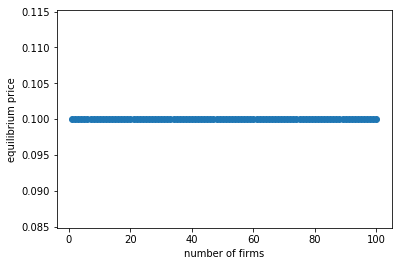

In [57]:
plt.scatter(df["n"], df["p"])
plt.xlabel ('number of firms')
plt.ylabel('equilibrium price')
plt.show()

Because the price is probably wrong, the plot is also not correct. The line should be decreasing instead of horizontal. The way I created the plot is the same as before. 

#### g) [0.5 points] As the number of firms becomes larger (goes to infinity) to which value does $p$ converge? Why is this the case; i.e. what is the *economic* intuition for this?

As the number of firms becomes larger, p does converge to zero. This is because when more firms enter the market, there will be more competition. Because of the competition there will be an increase in supply, while there isn't an increase in demand. This will lead to lower prices. Eventually there will be that much competition, that the prices will converge to zero. 

## Github

After you have finished, we need to upload this notebook on github.

Instructions on how to upload this on github can be found [on this page](http://janboone.github.io/programming-for-economists/github.html). This page has two screencasts: one shows how to drag the notebook onto your github page, the other shows how you can use the command line to upload your notebook.


Remember to update the README file in your repository to include a link to this notebook on github.


The links that you should post start with “github.com/” and are NOT of the form “http://localhost”. Make sure you test your links after uploading.